In [2]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [26]:
data = pd.read_csv("/Users/James/Desktop/countries.csv",usecols=[i for i in range(1,12)])
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Happiness
0,Switzerland,188.36,102.77,78.38,74.08,125.02,8.18,28.67,19.86,80.05,7.560
1,Denmark,186.25,86.43,73.78,79.79,88.53,7.00,28.69,21.29,81.80,7.646
2,Netherlands,180.27,76.65,72.84,75.28,78.93,7.28,27.64,25.39,87.00,7.449
3,Finland,178.95,80.11,72.41,76.19,76.35,8.57,28.91,11.99,56.64,7.809
4,Australia,178.41,91.07,56.97,77.86,80.75,7.27,34.81,23.69,92.70,7.223


In [27]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Happiness
0,Sweden,170.19,85.44,52.00,68.82,75.89,7.71,29.77,18.46,74.92,7.353
1,Australia,178.41,91.07,56.97,77.86,80.75,7.27,34.81,23.69,92.70,7.223
2,Ireland,150.54,71.58,54.49,52.82,78.55,6.69,38.10,33.86,89.13,7.129
3,Hong Kong,96.10,56.86,78.00,66.37,80.82,45.71,42.72,67.38,83.64,5.510
4,Israel,143.65,65.91,68.53,73.93,84.77,12.87,35.59,58.13,94.01,7.129


In [28]:
data.dtypes

Country                      object
Quality of Life             float64
Purchasing Power            float64
Safety                      float64
Healthcare                  float64
Cost of Living              float64
Property Price to Income    float64
Traffic Commute Time        float64
Pollution                   float64
Climate                     float64
Happiness                   float64
dtype: object

In [47]:
frac = 0.7

In [75]:
x, test_x = data.iloc[:,2:10][:round(len(data)*frac)],data.iloc[:,2:10][round(len(data)*frac):]
x.head(5)


,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate
0,85.44,52.00,68.82,75.89,7.71,29.77,18.46,74.92
1,91.07,56.97,77.86,80.75,7.27,34.81,23.69,92.70
2,71.58,54.49,52.82,78.55,6.69,38.10,33.86,89.13
3,56.86,78.00,66.37,80.82,45.71,42.72,67.38,83.64
4,65.91,68.53,73.93,84.77,12.87,35.59,58.13,94.01


In [76]:
y, test_y = data.iloc[:,10][:round(len(data)*frac)],data.iloc[:,10][round(len(data)*frac):]
y.head(5)

0    7.353
1    7.223
2    7.129
3    5.510
4    7.129
Name: Happiness, dtype: float64

In [77]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(x,y)

In [78]:
pred = clf.predict(test_x)
pred[:10]

array([5.951375, 5.951375, 5.951375, 5.951375, 5.951375, 5.951375,
       5.951375, 5.951375, 5.951375, 7.0787  ])

In [79]:
act = np.array(test_y)
act[:10]

array([5.546, 5.674, 5.102, 4.583, 6.305, 6.058, 4.673, 5.693, 3.573,
       6.664])

In [80]:
np.sum(np.abs(act-pred)<=0.1*pred)/len(test_y)

0.5416666666666666

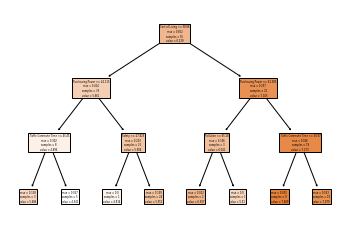

In [81]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf,feature_names=x.columns,filled=True)
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>